# Predicting Loan Sanction Amount
As a worker at XYZ Bank, it is in our interest to predict the loan amount that can be sanctioned to a given customer based on their attributes which are provided as features in the given dataset.
The purpose of this Notebook is to read in the "train.csv" dataset, perform cleaning and standardization procedures on it as a dataframe object, then perform exploratory data analysis, before using the data to train a Machine Learning model that can use the attributes as a features to predict a target variable in the form of Loan Sanction Amount for new customers.

Let us begin by importing the necessary dependencies for this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,RidgeCV
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import *
from sklearn import metrics 
import xgboost as xgb

#### Now, we shall read in the dataset(csv file) as a Pandas dataframe object

In [4]:
df = pd.read_csv('../Cipla_Project/dataset/train.csv')
df

Customer ID               Name Gender  Age  Income (USD)  \
0         C-36995   Frederica Shealy      F   56       1933.05   
1         C-33999  America Calderone      M   32       4952.91   
2          C-3770      Rosetta Verne      F   65        988.19   
3         C-26480         Zoe Chitty      F   65           NaN   
4         C-23459       Afton Venema      F   31       2614.77   
...           ...                ...    ...  ...           ...   
29995     C-43723  Angelyn Clevenger      M   38       4969.41   
29996     C-32511       Silas Slaugh      M   20       1606.88   
29997      C-5192       Carmelo Lone      F   49           NaN   
29998     C-12172      Carolann Osby      M   38       2417.71   
29999     C-33003  Bridget Garibaldi      F   63       3068.24   

      Income Stability            Profession     Type of Employment  \
0                  Low               Working            Sales staff   
1                  Low               Working                    NaN   
2                 High             Pensioner                    NaN   
3                 High             Pensioner                    NaN   
4                  Low               Working  High skill tech staff   
...                ...                   ...                    ...   
29995              Low  Commercial associate               Managers   
29996              Low               Working               Laborers   
29997              Low               Working            Sales staff   
29998              Low               Working         Security staff   
29999             High             Pensioner                    NaN   

         Location  Loan Amount Request (USD)  ...  Credit Score  \
0      Semi-Urban                   72809.58  ...        809.44   
1      Semi-Urban                   46837.47  ...        780.40   
2      Semi-Urban                   45593.04  ...        833.15   
3           Rural                   80057.92  ...        832.70   
4      Semi-Urban                  113858.89  ...        745.55   
...           ...                        ...  ...           ...   
29995       Urban                   76657.90  ...        869.61   
29996  Semi-Urban                   66595.14  ...        729.41   
29997       Urban                   81410.08  ...           NaN   
29998  Semi-Urban                  142524.10  ...        677.27   
29999       Rural                  156290.54  ...        815.44   

      No. of Defaults Has Active Credit Card  Property ID  Property Age  \
0                   0                    NaN          746       1933.05   
1                   0            Unpossessed          608       4952.91   
2                   0            Unpossessed          546        988.19   
3                   1            Unpossessed          890           NaN   
4                   1                 Active          715       2614.77   
...               ...                    ...          ...           ...   
29995               0            Unpossessed          566       4969.41   
29996               0               Inactive          175       1606.88   
29997               0                 Active          959           NaN   
29998               1            Unpossessed          375       2417.71   
29999               0                 Active          344       3068.24   

       Property Type Property Location  Co-Applicant  Property Price  \
0                  4             Rural             1       119933.46   
1                  2             Rural             1        54791.00   
2                  2             Urban             0        72440.58   
3                  2        Semi-Urban             1       121441.51   
4                  4        Semi-Urban             1       208567.91   
...              ...               ...           ...             ...   
29995              4             Urban             1       111096.56   
29996              3             Urban             1        73453.94   
29997 

### Data Cleaning and Standardization
Let us first take a look at the columns and their types

In [223]:
df.dtypes

Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                     int64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object

#### Determining Null Values
The first Step to cleaning a dataset is to deal with its null values. Here, we attempt to understand the number of null values throughout the dataset and for each specific column. The plot below depicts the number of null values in the dataset per column 

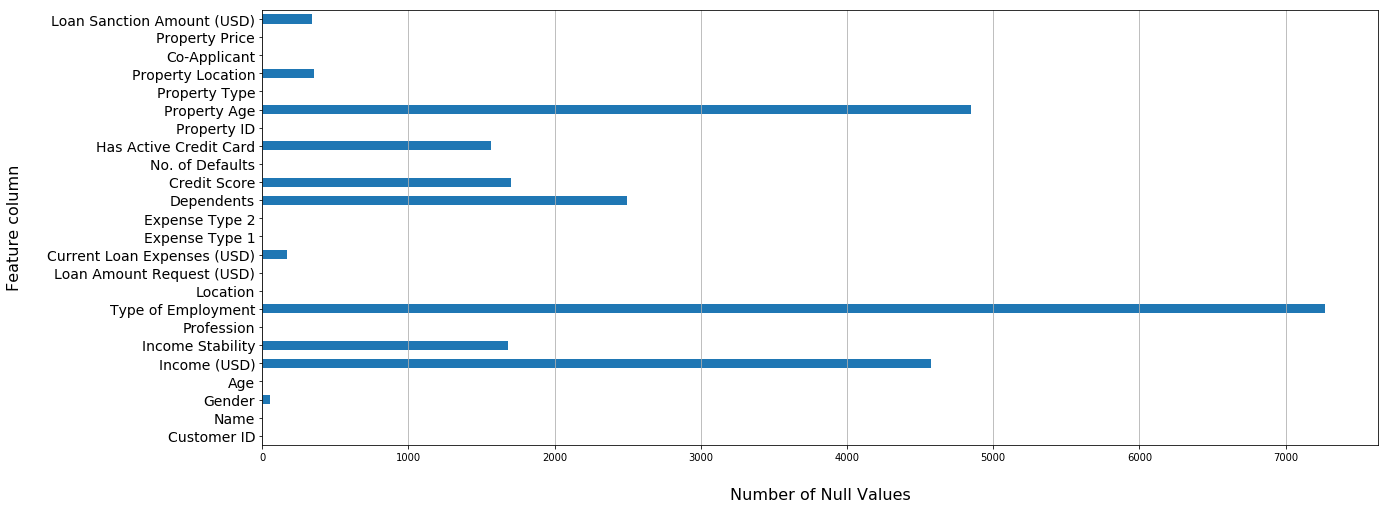

In [53]:
plt.figure(figsize=(20,8))
plt.xlabel('Number of Null Values',fontsize=16,labelpad=25)
plt.ylabel('Feature column',fontsize=16,labelpad=25)
plt.yticks(fontsize = 14) 
df.isna().sum().plot.barh()
plt.grid(axis='x')
plt.show()

There are many methods for dealing with null values in a dataset. Some of them are listed as follows:
1. Deleting Rows
2. Replacing With Mean/Median/Mode
3. Assigning a new "Unknown" Category
4. Predicting The Missing Values (with another model)
5. Using Algorithms Which Support Missing Values
For our purposes we shall be using a mixture of these solutions to deal with null values in our dataset. The efficient method would be to analyse the dataset on a column by column basis, dealing with the null values based on the column's importance and properties so that we may produce the best effect on our dataset

<b>Step 1</b>
For columns where the number of missing values is less than 3% of the dataset values, it would be logical to delete the rows altogether.
Let us do this in the next cell


In [6]:
def drop_nulls(df):
    for i,j in zip(df.isna().sum().index, df.isna().sum()):
        if j>0 and j< len(df)*0.03:
            print("Column '{}' has {} missing values which is less than 3% of the total values".format(i,j))
            df.dropna(inplace=True,subset = [i])
            print("Dropped {} null values in column '{}'\n".format(j,i))
    print("The number of rows in the dataset is now {}".format(len(df)))
    return df
df = drop_nulls(df)

Column 'Gender' has 53 missing values which is less than 3% of the total values
Dropped 53 null values in column 'Gender'

Column 'Current Loan Expenses (USD)' has 172 missing values which is less than 3% of the total values
Dropped 172 null values in column 'Current Loan Expenses (USD)'

Column 'Property Location' has 356 missing values which is less than 3% of the total values
Dropped 356 null values in column 'Property Location'

Column 'Loan Sanction Amount (USD)' has 340 missing values which is less than 3% of the total values
Dropped 340 null values in column 'Loan Sanction Amount (USD)'

The number of rows in the dataset is now 29097


As can be seen, the columns having less than 3% missing values have been dealth with. Our dataframe still more than 98% of its original size so we do not have a notable loss of data
<br>
<b>Step 2</b> Now we must deal with the null values in columns where more than 10% data is missing
<br>For such attributes, it is unadvisable to simply drop data - it would result in a significant loss
<br>It is also unadvisable to replace the missing values with a new value such as "Unknown" - this would introduce a significant bias to the machine learning model which would not understand the real meaning of the variable and would simply treat it as another feature. 
<br> The most logical thing to do in such cases would be to carry out some form of imputation. If the attribute is numerical, replacing the missing values with the mean would suffice. If the numerical attribute is liable to suffer from a lot of noise/outliers then imputing the median would be better. On the other hand, if the attribute is categorical, imputing the mode would be a better option
<br><br> The cell below will demonstrate the necessary code to deal with the described situations. We shall first check if a column has above 10% missing values. If so, then we shall check if the column is numerical. If so, next we shall check for skewness. Skewness of a normal distribution is zero so if the skew is over +1 or under -1, the distribution is highly skewed hence we shall impute the median. If no, the mean. If the attribute is categorical, we shall impute the mode.

In [7]:
def impute_nulls(df):
    for i,j in zip(df.isna().sum().index, df.isna().sum()):
        if j>len(df)*0.1:
            if df[i].dtype == np.float64:
                if df[i].skew() >1 or df[i].skew()< -1:
                    df[i].fillna(df[i].median(),inplace=True)
                    print('Replaced nulls in column "{}" with value "{}"'.format(i,df[i].median()))
                else:
                    df[i].fillna(df[i].mean(),inplace=True)
                    print('Replaced nulls in column "{}" with value "{}"'.format(i,df[i].mean()))

            else:
                df[i].fillna(df[i].mode()[0],inplace=True)
                print('Replaced nulls in column "{}" with value "{}"'.format(i,df[i].mode()[0]))
    return df
df = impute_nulls(df)

Replaced nulls in column "Income (USD)" with value "2222.33"
Replaced nulls in column "Type of Employment" with value "Laborers"
Replaced nulls in column "Property Age" with value "2222.47"


<B>Step 3</B> Now we must deal with the remaining columns which have between 3% and 10% missing data.
<br> It is not advisable to drop such columns but it is possible to replace the missing values as a separate category as it would not introduce significant bias to the model - the missing values still being under 10%. However if the attribute is not categorical, it would not make sense to hard code a categorical value. Here, we can instead make use of the pandas interpolate() method where we shall use a linear interpolation model to fill in the missing values.
<br><br> In the next cell, we shall introduce a few lines of code that check if the number of missing values for a column is in the specified range, if so then whether the column is categorical or numeric and accordingly perform the actions outlined above.

In [8]:
def replace_nulls(df):
    for i,j in zip(df.isna().sum().index, df.isna().sum()):
        if j<len(df)*0.1 and j >len(df)*0.03:
            if df[i].dtype == np.float64:
                df[i].interpolate(method='linear',inplace=True)
                print('Replaced {} nulls in column "{}"'.format(j,i))

            else:
                df[i].fillna('Unknown',inplace=True)
                print('Replaced {} nulls in column "{}"'.format(j,i))
    return df
df = replace_nulls(df)

Replaced 1601 nulls in column "Income Stability"
Replaced 2368 nulls in column "Dependents"
Replaced 1621 nulls in column "Credit Score"
Replaced 1512 nulls in column "Has Active Credit Card"


### Reducing redundant features
Now that we have dealt with all the null values throughout the dataset, our next step will be to eliminate any columns which are redundant - i.e. they have no obvious purpose for training a machine learning model. Logically, attributes such as Customer ID or Name should not influence the decision made by XYZ Bank when approving a Loan Sanction amount. Thus such columns can be discarded before training.

<br>We shall manually observe the dataset columns to find and discard such redundancies
<br>The correlation matrix may also enlighten us if there are any redundant columns i.e. if 2 columns have a 1.0 correlation factor, they have all the same values.

In [9]:
df.corr().style.background_gradient(cmap='Blues').set_precision(2)

From the correlation matrix, we can observe the correlation of the different (numeric) features with regards to our traget variable : Loan Sanction Amount. The highly correlated attributes such as "Loan Amount Request" and "Property Price" logically influence the decision of the bank to sanction the final loan amount. On the other hand, weakly correlated variables will likely not have any influence on the target. 
<br> Feature selection at this stage will totally depend on what sort of model we need to apply. As we are more concerned with data cleaning at this step, we shall not discard features here based on correlation. Rather we will use the correlation matrix to identify duplicate features. For eg. the matrix reveals a 1.0 co-efficient between "Income (USD)" and "Property Age" meaning that it is the same column with a different label. Hence we can discard it. 

In [10]:
def drop_cols(df):
    df.drop(['Customer ID', 'Name','Property Age'], axis = 1,inplace=True)
    return df
df = drop_cols(df)

## Standardization
In this stage, we need to standardize the data so that it is fit for feeding to a machine learning model. We first begin with data profiling.
<br><br><b>Step 1 </b>Dealing with outliers
For this step, we try to reduce the skewness of our dataset by dealing with outliers that can introduce a significant amount of variance in our dataset.
<br> Let us check individual columns (numeric) for skewness so that we can determine if the corresponding features suffer from a presence of outliers

In [11]:
df.skew()

Age                              0.045130
Income (USD)                   164.839489
Loan Amount Request (USD)        1.262623
Current Loan Expenses (USD)      0.070381
Dependents                       0.805981
Credit Score                    -0.021399
No. of Defaults                  1.547716
Property ID                     -0.010720
Property Type                    0.051360
Co-Applicant                   -13.289954
Property Price                   1.420012
Loan Sanction Amount (USD)       1.234692
dtype: float64

We can see that some columns suffer from a very high skew co-efficient. The rule of thumb seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.
<br><br> So we can see that columns "Income (USD)" , "Loan Amount Request (USD)" and "Co-Applicant" are highly skewed in their values - we must take care of these columns on a case-by-case basis. First let us see how they fare in their distribution by plotting a scatterplot of their values. A scatterplot is useful in determining outliers. 

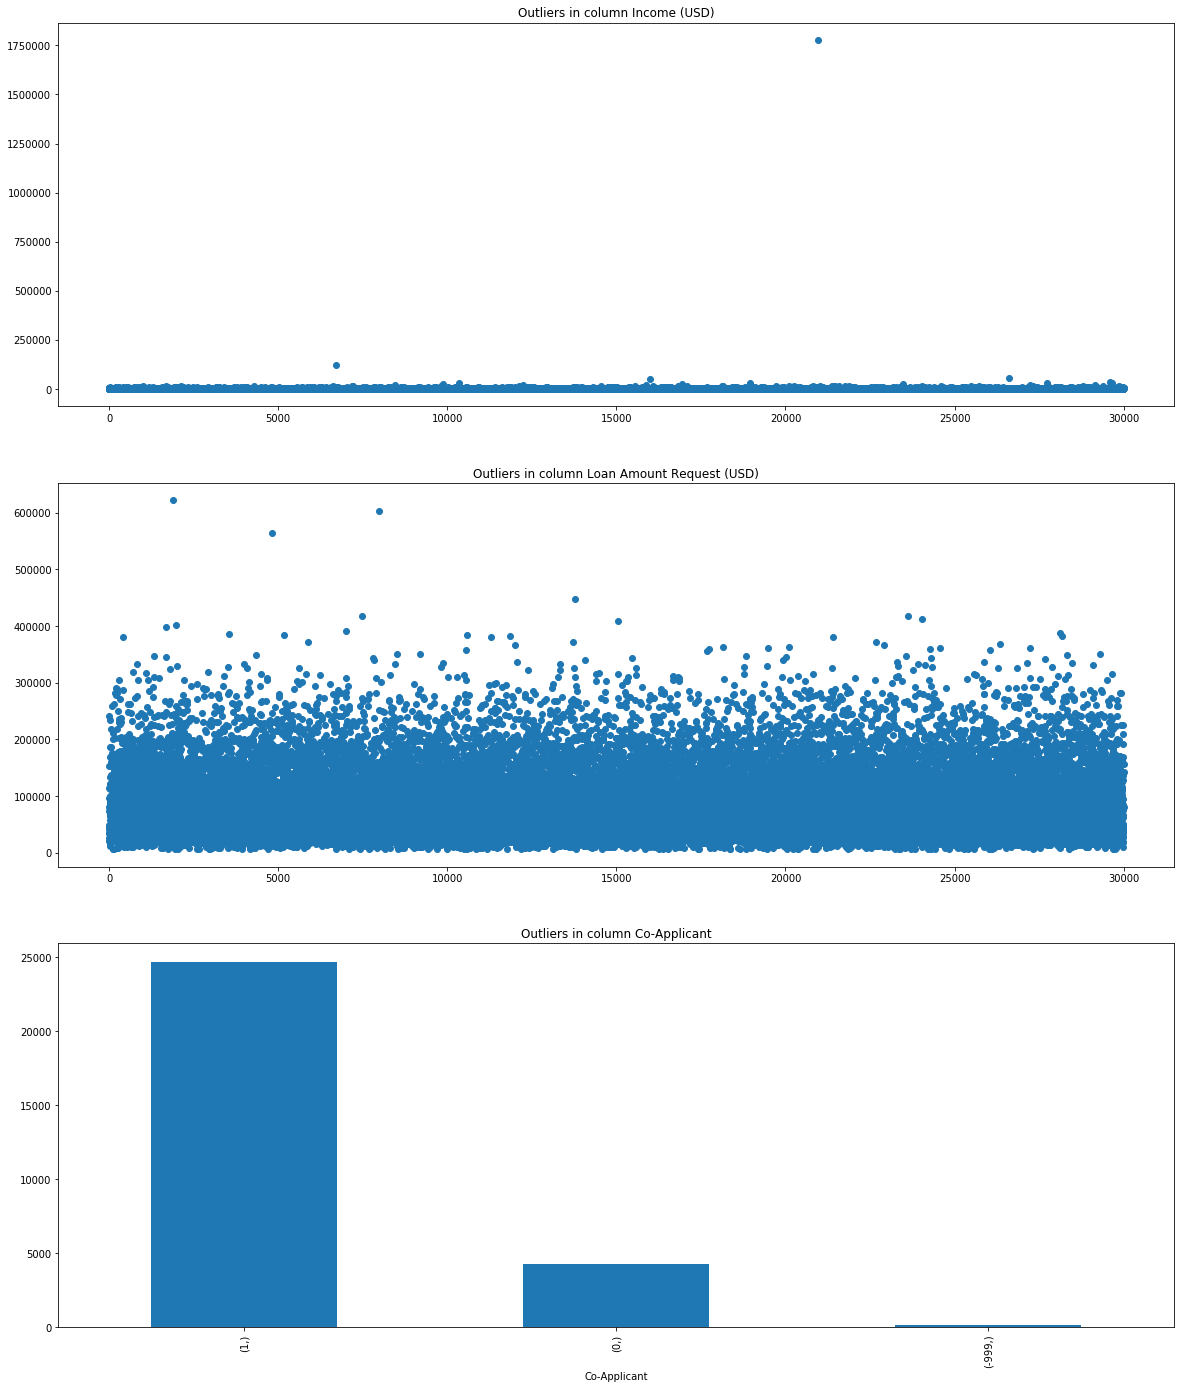

In [147]:
fig, axs = plt.subplots(3,figsize=(20,24))
#plt.figure(figsize=(20,8))
axs[0].scatter(df['Income (USD)'].index, df['Income (USD)'])
axs[0].set_title('Outliers in column Income (USD)')
axs[1].scatter(df['Loan Amount Request (USD)'].index, df['Loan Amount Request (USD)'])
axs[1].set_title('Outliers in column Loan Amount Request (USD)')
df.value_counts(subset=['Co-Applicant']).plot.bar()
axs[2].set_title('Outliers in column Co-Applicant')
plt.show()

Now that we can see the distribution (and the outliers) in each of the concerned columns, let us proceed to eliminate them, so that we can reduce the skewness.
<BR> One approach to eliminating outliers is to use the quantile function to filter rows that lie outside the quantile range. For example, in a normal distribution, 99.7% values lie within 3 standard deviations from the mean. For our purposes let us eliminate any values that lie over the quantile value of 0.99. 

In [12]:
def drop_outliers(df):
    temp = len (df)
    df = df[df['Income (USD)'] < df['Income (USD)'].quantile(0.997)]
    df = df[df['Loan Amount Request (USD)'] < df['Loan Amount Request (USD)'].quantile(0.997)]
    df = df[df['Co-Applicant'] >= 0]
    print('Dropped {} rows containing outliers'.format(temp - len(df)))
    return df
df = drop_outliers(df)

Dropped 337 rows containing outliers


#### Let us check the distribtuion of the columns again

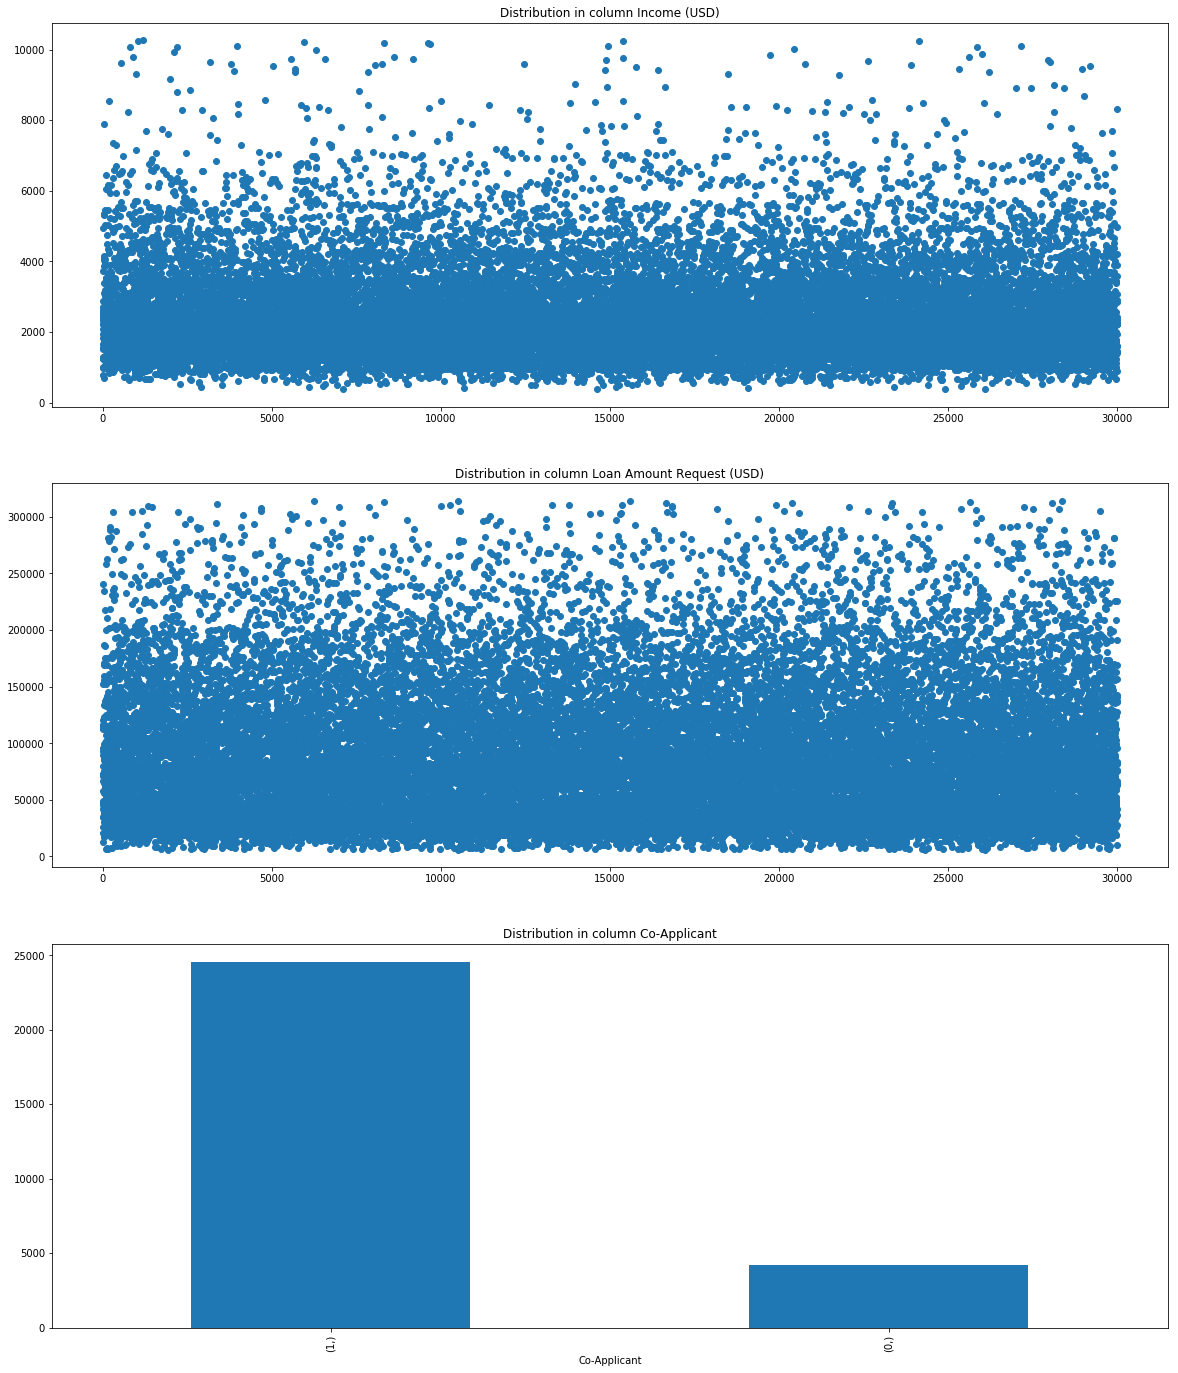

In [149]:
fig, axs = plt.subplots(3,figsize=(20,24))
#plt.figure(figsize=(20,8))
axs[0].scatter(df['Income (USD)'].index, df['Income (USD)'])
axs[0].set_title('Distribution in column Income (USD)')
axs[1].scatter(df['Loan Amount Request (USD)'].index, df['Loan Amount Request (USD)'])
axs[1].set_title('Distribution in column Loan Amount Request (USD)')
df.value_counts(subset=['Co-Applicant']).plot.bar()
axs[2].set_title('Distribution in column Co-Applicant')
plt.show()

The distributions appear much better now. Let us recheck the skewness of the dataframe just to be sure.

In [13]:
df.skew()

Age                            0.043167
Income (USD)                   1.877649
Loan Amount Request (USD)      1.070248
Current Loan Expenses (USD)   -0.288317
Dependents                     0.806791
Credit Score                  -0.019328
No. of Defaults                1.551552
Property ID                   -0.011009
Property Type                  0.051447
Co-Applicant                  -1.997277
Property Price                 1.209436
Loan Sanction Amount (USD)     1.101913
dtype: float64

Now that we have the numeric columns out of the way, let us glance over the categorical column to check if anything looks fishy. We can see the unique values in each of the categorical columns in the next cell

In [151]:
for i in df.columns:
    if df[i].dtype != np.float64 and df[i].dtype != np.int64:
        print('Unique values in column "{}" are : {}\n'.format(i,list(df[i].unique())))

Unique values in column "Gender" are : ['F', 'M']

Unique values in column "Income Stability" are : ['Low', 'High', 'Unknown']

Unique values in column "Profession" are : ['Working', 'Pensioner', 'State servant', 'Commercial associate', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']

Unique values in column "Type of Employment" are : ['Sales staff', 'Laborers', 'High skill tech staff', 'Secretaries', 'Managers', 'Cooking staff', 'Core staff', 'Drivers', 'Realty agents', 'Security staff', 'Accountants', 'Waiters/barmen staff', 'Medicine staff', 'Private service staff', 'Cleaning staff', 'Low-skill Laborers', 'HR staff', 'IT staff']

Unique values in column "Location" are : ['Semi-Urban', 'Rural', 'Urban']

Unique values in column "Expense Type 1" are : ['N', 'Y']

Unique values in column "Expense Type 2" are : ['N', 'Y']

Unique values in column "Has Active Credit Card" are : ['Unknown', 'Unpossessed', 'Active', 'Inactive']

Unique values in column "Property Location" are : 

Manual observation does not yield any strange values that might require string correction or similar efforts. Thus we can say the data has been pretty much standardized. 
<br><br><b>Next Step</b> : Standardization by formatting data types
<br> Another measure we can take towards standardization of the dataset is to ensure every feature is in an approved format. For example, if we consult the second cell of this notebook we find that most of the column types are "object" and not "string". Similarly, it would be more efficient if we convert certain columns such as 

In [14]:
def change_type(df):
    for i in df.columns:
        if df[i].dtype != np.float64 and df[i].dtype != np.int64:
            df[i] = df[i].astype('string') 
    return df
df = change_type(df)
df.dtypes

Gender                          string
Age                              int64
Income (USD)                   float64
Income Stability                string
Profession                      string
Type of Employment              string
Location                        string
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  string
Expense Type 2                  string
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          string
Property ID                      int64
Property Type                    int64
Property Location               string
Co-Applicant                     int64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object

## Feature Transformation
Now that most of our dataset is cleaned and standardized, the next stage in our pipelinemust be to transform features so that they can be interpreted by a machine learning model. In general, most machine learning models  only accept numerical values for training. For example, models such as Regression can only handle numerical values since there is a calculation being made which cannot be otherwise performed with string or other object types that arise from having categorical variables. 
<br> The process of converting categorical values to a numeric type is called encoding and that is what we are going to do in this next step. Some of the types of encoding are :
* One-hot encoding
* Label encoding
* Feature hashing
* Binary encoding & BaseN encoding
* Frequency encoding
<br><br>As a general rule of thumb, the type of encoding we perform for a categorical feature would be dependent on the ordinality of the variable. An ordinal variable is one which exhibits some form of order in its values. For example: High/Medium/Low or Bachelor/Master/PhD. For such types, it is more sensible to transform the string values into a number which preserves the order. For instance {High,Medium,Low} -> {3,2,1} as they convey a similar relationship. 
<br><br>On the other hand, we can also have nominal variables such as "City" where there is no percievable order. For example, if we have to encode the values {Toronto,Vancouver,Calgary} -> {1,2,3} this would confuse the model which would try to interpret the encoded variable as having some form of order. Since no city is greater than other or less than other in an ordinal manner. Hence, it would be more logical to use another form of encoding such as One-Hot Encoding. 
<br><b>Step 1</b> Convert all binary variables to 0/1

In [15]:
def encode_binary(df):
    for i in df.columns:
        try:
            if df[i].nunique() == 2 and df[i].dtype == 'string':
                df[i].replace(to_replace=list(df[i].unique()), value=[0, 1],inplace=True)
                print("Replaced values {} in column '{}' with [0,1]".format(list(df[i].unique()),i))
        except TypeError:
            pass
    return df
df = encode_binary(df)

Replaced values [0, 1] in column 'Gender' with [0,1]
Replaced values [0, 1] in column 'Expense Type 1' with [0,1]
Replaced values [0, 1] in column 'Expense Type 2' with [0,1]


Now that we have replaced binary categorical columns with 0,1 values, we must do so for tertiary columns. The tertiary columns for this dataset represent some form of ordinal values

In [16]:
def encode_ordinal(df):
    df['Income Stability'].replace(to_replace=['Low', 'High', 'Unknown'], value=[0, 1, 0.5],inplace=True)
    df['Location'].replace(to_replace=['Rural', 'Urban', 'Semi-Urban'], value=[0, 1, 0.5],inplace=True)
    df['Property Location'].replace(to_replace=['Rural', 'Urban', 'Semi-Urban'], value=[0, 1, 0.5],inplace=True)
    return df
df = encode_ordinal(df)

Now we only have 3 remaining categorical columns. Since they are of a Nominal Type, we will use One-Hot Encoding to turn them to a numeric representation.

In [17]:
def encode_nominal(df):
    df = pd.concat([df,pd.get_dummies(df['Profession'], prefix='Profession',prefix_sep=':')],axis=1)
    df = pd.concat([df,pd.get_dummies(df['Type of Employment'], prefix='Employment_Type',prefix_sep=' : ')],axis=1)
    df = pd.concat([df,pd.get_dummies(df['Has Active Credit Card'], prefix='Credit_Card',prefix_sep=' : ')],axis=1)
    df.drop(columns=['Profession','Type of Employment','Has Active Credit Card'],inplace=True)
    return df
df = encode_nominal(df)
df

Gender  Age  Income (USD)  Income Stability  Location  \
0           0   56       1933.05               0.0       0.5   
1           1   32       4952.91               0.0       0.5   
2           0   65        988.19               1.0       0.5   
3           0   65       2222.33               1.0       0.0   
4           0   31       2614.77               0.0       0.5   
...       ...  ...           ...               ...       ...   
29995       1   38       4969.41               0.0       1.0   
29996       1   20       1606.88               0.0       0.5   
29997       0   49       2222.33               0.0       1.0   
29998       1   38       2417.71               0.0       0.5   
29999       0   63       3068.24               1.0       0.0   

       Loan Amount Request (USD)  Current Loan Expenses (USD)  Expense Type 1  \
0                       72809.58                       241.08               0   
1                       46837.47                       495.81               0   
2                       45593.04                       171.95               0   
3                       80057.92                       298.54               0   
4                      113858.89                       491.41               0   
...                          ...                          ...             ...   
29995                   76657.90                       722.34               1   
29996                   66595.14                       253.04               0   
29997                   81410.08                       583.11               0   
29998                  142524.10                       378.29               0   
29999                  156290.54                       693.94               0   

       Expense Type 2  Dependents  ...  \
0                   0         3.0  ...   
1                   1         1.0  ...   
2                   1         1.0  ...   
3                   1         2.0  ...   
4                   1         2.0  ...   
...               ...         ...  ...   
29995               1         2.0  ...   
29996               0         3.0  ...   
29997               1         3.0  ...   
29998               1         3.0  ...   
29999               1         1.0  ...   

       Employment_Type : Private service staff  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
...                                        ...   
29995                                        0   
29996                                        0   
29997                                        0   
29998                                        0   
29999                                        0   

       Employment_Type : Realty agents  Employment_Type : Sales staff  \
0                                    0                              1   
1                                    0                              0   
2                                    0                              0   
3                                    0                              0   
4                                    0                              0   
...                                ...                            ...   
29995                                0                              0   
29996                                0                              0   
29997                                0                              1   
29998                                0                              0   
29999                                0                              0   

       Employment_Type : Secretaries  Employment_Type : Security staff  \
0                                  0                                 0   
1                                  0                                 0   
2                                  0                        

Thus Ends our Data Cleaning and Standardization step and we can begin with our Machine Learning phase. In the following part, we can begin the actual predictive modelling process to come up with values for a Loan Sanction Amount that the bank can give a customer provided all the same features as in the training set.
<br>
## Model Selection
In this stage, we need to pick a model that can predict a value for the Loan Sanction Amount for a new customer in the database. Firstly, it is important to note that the target variable is continuous. Since the Loan Sanction Amount is a float that can take any number of (infinite) values within a range, it is necessary to choose a model that can predict a continuous variable with N number of inputs.
<br>In other words, what we are dealing with is a <b>Regression</b> problem. Hence, we need to pick a Regression model for this task. Some well-known Regression models are :
* Linear Regression
* Ridge Regression
* Elastic Net
* Decision Trees
* Random Forest Regression
* GBM
* Light GBM
* XGboost
* Adaboost
* Neural Networks
<br>Our approach in this notebook will be to take multiple models, test each one of them to determine which one is best suited for our problem and then use the one with the best tradeoff to preict the target variable for our test set.
<br> Let us start by preparing the dataset for validating the model. The sklearn library’s train_test_split method uses a stratified split, which means that the train and test set have the same distribution of the target variable.

In [18]:
x = df.drop('Loan Sanction Amount (USD)',axis = 1)
y = df['Loan Sanction Amount (USD)']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Linear Regression
For our first test, let us use the simplest of models : Linear Regression. Linear regression is a statistical method for modelling relationship between a dependent variable with a given set of independent variables. Essentially, this model tries to fit a line (hence its name) through the training data so that it can map a linear relationship to the target variable whenever there is a new data point.
<br> Since we are dealing with several variables(features) as input, this process is called Multiple Linear Regression. 

In [417]:
#Build a model
linear_model = LinearRegression()

# fit the model with data
linear_model.fit(X_train,y_train)
prediction_arr = linear_model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction_arr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction_arr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_arr)))
print('Accuracy (R^2): {} %'.format(round(linear_model.score(X_test, y_test)*100,4)))
print('\nSome of the predicted values are : {}'.format(linear_model.predict(X_test)[:10]))

Mean Absolute Error: 19071.572400475572
Mean Squared Error: 776417941.0495934
Root Mean Squared Error: 27864.277149238835
Accuracy (R^2): 63.7713 %

Some of the predicted values are : [ 50115.45538043  88847.12565846  43400.2598104   36225.05544427
  81656.127225   125909.83712165  28263.69711208  45305.90628012
  53636.78193528  84689.02443027]


#### Using Cross-Validation
Introducing cross-validation into the process helps you to reduce the need for the validation set because you’re able to train and test on the same data.It’s possible that you accidentally train on a subset which doesn’t reflect the real world.
<br>Imagine that you try to predict whether a person is a male or a female by his or her height and weight. One would assume that taller and heavier people would rather be males; though if you’re very unlucky your train data would only contain dwarf men and tall Amazon women. Thanks to cross validation you perform multiple train_test split and while one fold can achieve extraordinary good results the other might underperform. Anytime one of the splits shows unusual results it means that there’s an anomaly in your data.

In [384]:
#Start by Cross Validation with 10 Splits
scores = cross_val_score(linear_model, x, y, cv=10)
print('The scores with 10 Splits are : {}'.format(scores))

#K-Fold Cross Validation
folds = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(linear_model, x, y, cv=10)
print('\nThe scores with K-Folds = 10 are : {}'.format(scores))

#Leave One Out cross validation
scores = cross_val_score(linear_model, x, y, cv=LeaveOneOut())
print('\nThe scores with LOOCV = 10 are : {}'.format(scores))

The scores with 10 Splits are : [0.62392057 0.63947037 0.62315318 0.59003696 0.63680929 0.63091794
 0.61858271 0.67518512 0.65503857 0.64652221]

The scores with K-Folds = 10 are : [0.62392057 0.63947037 0.62315318 0.59003696 0.63680929 0.63091794
 0.61858271 0.67518512 0.65503857 0.64652221]

The scores with LOOCV are : [0.62390057 0.63922037 0.64315318 0.58303696 0.66180929 0.60191794 0.62358271 0.67518512 0.65503857 0.64652221]


Hence, as we can see, Cross Validation does not seem to affect the model's performance.

In [389]:
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(linear_model, x, y,
                                       param_name = "n_jobs",
                                       param_range = np.arange(1, 10, 1),
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

ValueError: continuous is not supported

### Ridge Regression
In the next step, we will utilise a Ridge Regression model. Ridge regression is a way to create a parsimonious model when the number of predictor variables in a set exceeds the number of observations, or when a data set has multicollinearity (correlations between predictor variables).
<BR> Let us fit the data to the Ridge Regression model (with Cross Validation) and evaluate the model's performance 

In [410]:
ridge_cv = RidgeCV(normalize=True, cv=10)
ridge_cv.fit(X_train, y_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ridge_cv.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ridge_cv.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ridge_cv.predict(X_test))))
print('Accuracy (R^2): {} %'.format(round(ridge_cv.score(X_test, y_test)*100,4)))
print('\nSome of the predicted values are : {}'.format(ridge_cv.predict(X_test)[:10]))

Mean Absolute Error: 19506.761838710132
Mean Squared Error: 800363718.2732097
Root Mean Squared Error: 28290.700208252354
Accuracy (R^2): 62.654 %

Some of the predicted values are : [ 46381.24859084  84616.68378378  42812.81622184  37139.20013614
  80737.79674857 116838.39672908  30877.32931728  45735.48542322
  52474.74338181  77137.51176388]


It achieves a similar score compared with the Linear Regression model. That isn't unexpected, given they are both part of the same parent Algorithm. Now let us try another approach.
<br>
### Random Forest Regression
Next, we try our hand at predicting Loan Sanctions by using the Random Forest Regressor. Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.
<br>Let us fit our data to a Random Forest Regressor and evaluate this model.

In [415]:
random_forest = RandomForestRegressor(max_depth=7)

random_forest.fit(X_train, y_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, random_forest.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, random_forest.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, random_forest.predict(X_test))))
print('Accuracy (R^2): {} %'.format(round(random_forest.score(X_test, y_test)*100,4)))
print('\nSome of the predicted values are : {}'.format(random_forest.predict(X_test)[:10]))

Mean Absolute Error: 10744.107333465396
Mean Squared Error: 505478088.7470623
Root Mean Squared Error: 22482.839872824392
Accuracy (R^2): 76.4137 %

Some of the predicted values are : [ 64688.76319965  99263.09358871  46400.45083158  46499.95485058
  81200.94493707 138346.70233219  27420.44485161  59115.23538929
  51171.79476997  98087.42956659]


We can observe that a stock Random Forest Regressor model achieves a much better R^2 score than Linear algorithms. We can keep this model in mind as the best performer for now. Let us explore a few other options before we pick one of them.
<br>
### AdaBoost Regressor
An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. let us evaluate its performance on our dataset

In [416]:
adab = AdaBoostRegressor()
# evaluate the model
adab.fit(X_train, y_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, adab.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, adab.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, adab.predict(X_test))))
print('Accuracy (R^2): {} %'.format(round(adab.score(X_test, y_test)*100,4)))
print('\nSome of the predicted values are : {}'.format(adab.predict(X_test)[:10]))

Mean Absolute Error: 25806.713530723955
Mean Squared Error: 1045897237.3503805
Root Mean Squared Error: 32340.334527496474
Accuracy (R^2): 51.1971 %

Some of the predicted values are : [49057.32981051 70345.24493902 34437.27290363 30114.79645361
 55310.25315371 83213.84737973 22031.1071567  46446.83761244
 30114.79645361 66859.10777994]


### XGBoost Regrression
Similar to AdaBoost, we can also use XGBoost or Extreme Gradient Boosting model. XGBoost is a powerful approach for building supervised regression models. The objective function contains loss function and a regularization term. It tells about the difference between actual values and predicted values, i.e how far the model results are from the real values. The most common loss functions in XGBoost for regression problems is reg:linear, and that for binary classification is reg:logistics.
<br><br>
Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods. XGBoost expects to have the base learners which are uniformly bad at the remainder so that when all the predictions are combined, bad predictions cancels out and better one sums up to form final good predictions.

In [420]:
xgbst  = xgb.XGBRegressor()

xgbst.fit(X_train, y_train)
prediction_arr = xgbst.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction_arr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction_arr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_arr)))
print('Accuracy (R^2): {} %'.format(round(adab.score(X_test, y_test)*100,4)))
print('\nSome of the predicted values are : {}'.format(prediction_arr[:10]))

Mean Absolute Error: 11710.810191429255
Mean Squared Error: 531938301.2835889
Root Mean Squared Error: 23063.78766125783
Accuracy (R^2): 51.1971 %

Some of the predicted values are : [ 61841.09   90349.05   44494.824  45848.12   80114.555 133087.27
  27859.357  57198.445  51541.22   87063.055]


### Gradient Boosting
As a final resort, we also try using the Gradient Boosting model for regression.
<br>
GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

In [424]:
GBM = GradientBoostingRegressor()
GBM.fit(X_train, y_train)
prediction_arr = GBM.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction_arr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction_arr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_arr)))
print('Accuracy (R^2): {} %'.format(round(adab.score(X_test, y_test)*100,4)))
print('\nSome of the predicted values are : {}'.format(prediction_arr[:10]))

Mean Absolute Error: 12912.948890423073
Mean Squared Error: 525162853.8249388
Root Mean Squared Error: 22916.431961039198
Accuracy (R^2): 51.1971 %

Some of the predicted values are : [ 59540.42201305  91961.1784135   43486.0630357   47164.76805491
  76924.7025668  134790.07711386  27022.3706604   52931.53560809
  51771.37000901  91133.58202458]


In [3]:
!pip install evalml

OSError: "sh" shell not found

In [5]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='/tmp/autosklearn_regression_example_tmp',
    output_folder='/tmp/autosklearn_regression_example_out',
)

ModuleNotFoundError: No module named 'scipy.optimize._shgo_lib.sobol_seq'

In [10]:
from scipy.optimize._shgo_lib.sobol_seq import Sobol

ModuleNotFoundError: No module named 'scipy.optimize._shgo_lib.sobol_seq'